In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Raw Data

In [3]:
#data = pd.read_csv('./data/2014.csv')

In [4]:
#data.head(1)

## Formatting

In [5]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [6]:
#data.info()

In [7]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitiude':'long','Mapped Location':'map_loc'}, axis=1)

In [8]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [9]:
#to avoid having to recreate and reload info
#df_14 = data.to_csv('./data/df_2014_formatted.csv', index = False)

## Load Formatted Data

In [10]:
df_14 = pd.read_csv('./data/df_2014_formatted.csv')

In [12]:
df_14['call_re'] = pd.to_datetime(df_14['call_re'])

## Stats

In [13]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193159 entries, 0 to 1193158
Data columns (total 21 columns):
event_num       1193159 non-null object
call_re         1193159 non-null datetime64[ns]
comp_num        1193159 non-null int64
shift           1140785 non-null object
tc              1193159 non-null int64
tc_desc         1193159 non-null object
tc_suff         568326 non-null object
tc_suff_desc    552637 non-null object
disp_code       1193159 non-null int64
disp_desc       1189239 non-null object
block           1193159 non-null int64
st_name         1193142 non-null object
unit_disp       1142205 non-null object
sect            1180220 non-null object
zone            1180220 non-null float64
rpa             1193159 non-null int64
lat             1186363 non-null float64
Longitude       1186363 non-null float64
map_loc         1186363 non-null object
month           1193159 non-null int64
day             1193159 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(

## Worst Days & Weeks

Text(0, 0.5, 'Number of Incidents')

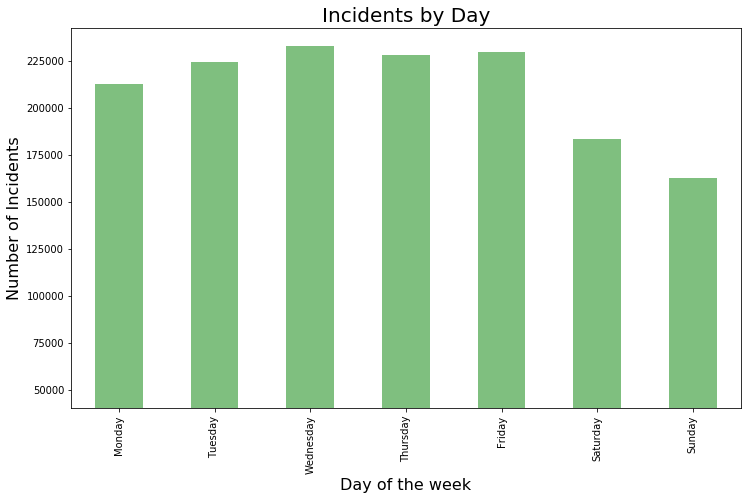

In [18]:
# Number of scooter per day of the week
day_incidents = df_14.groupby(df_14['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

In [19]:
# Number of scooter per day of the week
wk_incidents = df_14.groupby(df_14['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     26074
2     25479
3     25188
4     25547
5     24063
6     22094
7     21513
8     21367
9     22644
10    23657
11    24703
12    23666
13    24775
14    23352
15    24388
16    23927
17    24735
18    23624
19    23261
20    23464
21    23905
22    24458
23    25018
24    24304
25    23945
26    23511
27    21942
28    21866
29    20618
30    21012
31    21297
32    20658
33    21254
34    22519
35    22376
36    20885
37    23348
38    21739
39    22690
40    22165
41    21945
42    22443
43    22147
44    22858
45    22577
46    22757
47    24148
48    21135
49    23294
50    22693
51    23018
52    17113
Name: call_re, dtype: int64


In [20]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [21]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,26074
2,2,25479
3,3,25188
4,4,25547
5,5,24063
6,6,22094
7,7,21513
8,8,21367
9,9,22644
10,10,23657


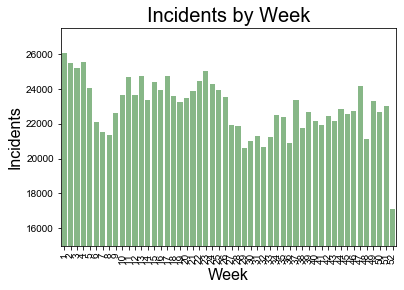

In [22]:
plt.ylim(15000, 27500)

g = sns.barplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(50,50)})
plt.title("Incidents by Week", fontsize = 20)
plt.xlabel("Week", fontsize = 16)
plt.ylabel("Incidents", fontsize = 16)
plt.show()

Text(0, 0.5, 'Number of Incidents')

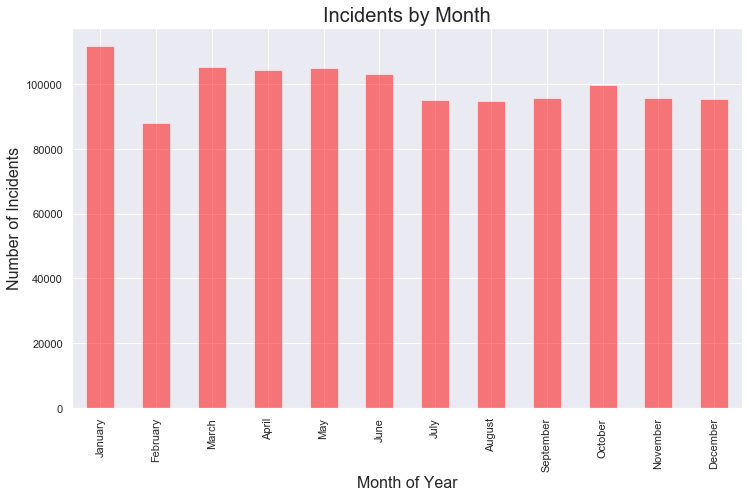

In [24]:
# Number of incidents per Month
mth_incidents = df_14.groupby(df_14['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5, bottom = 0)

# title and x,y labels
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Worst Day of Week = Wednesday 
\ Worst Week of Year = 1 
\ Worst Month of Year = January 

## Incidents Reported

In [25]:
inc_ct = df_14.tc_desc.value_counts()

In [26]:
inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [27]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

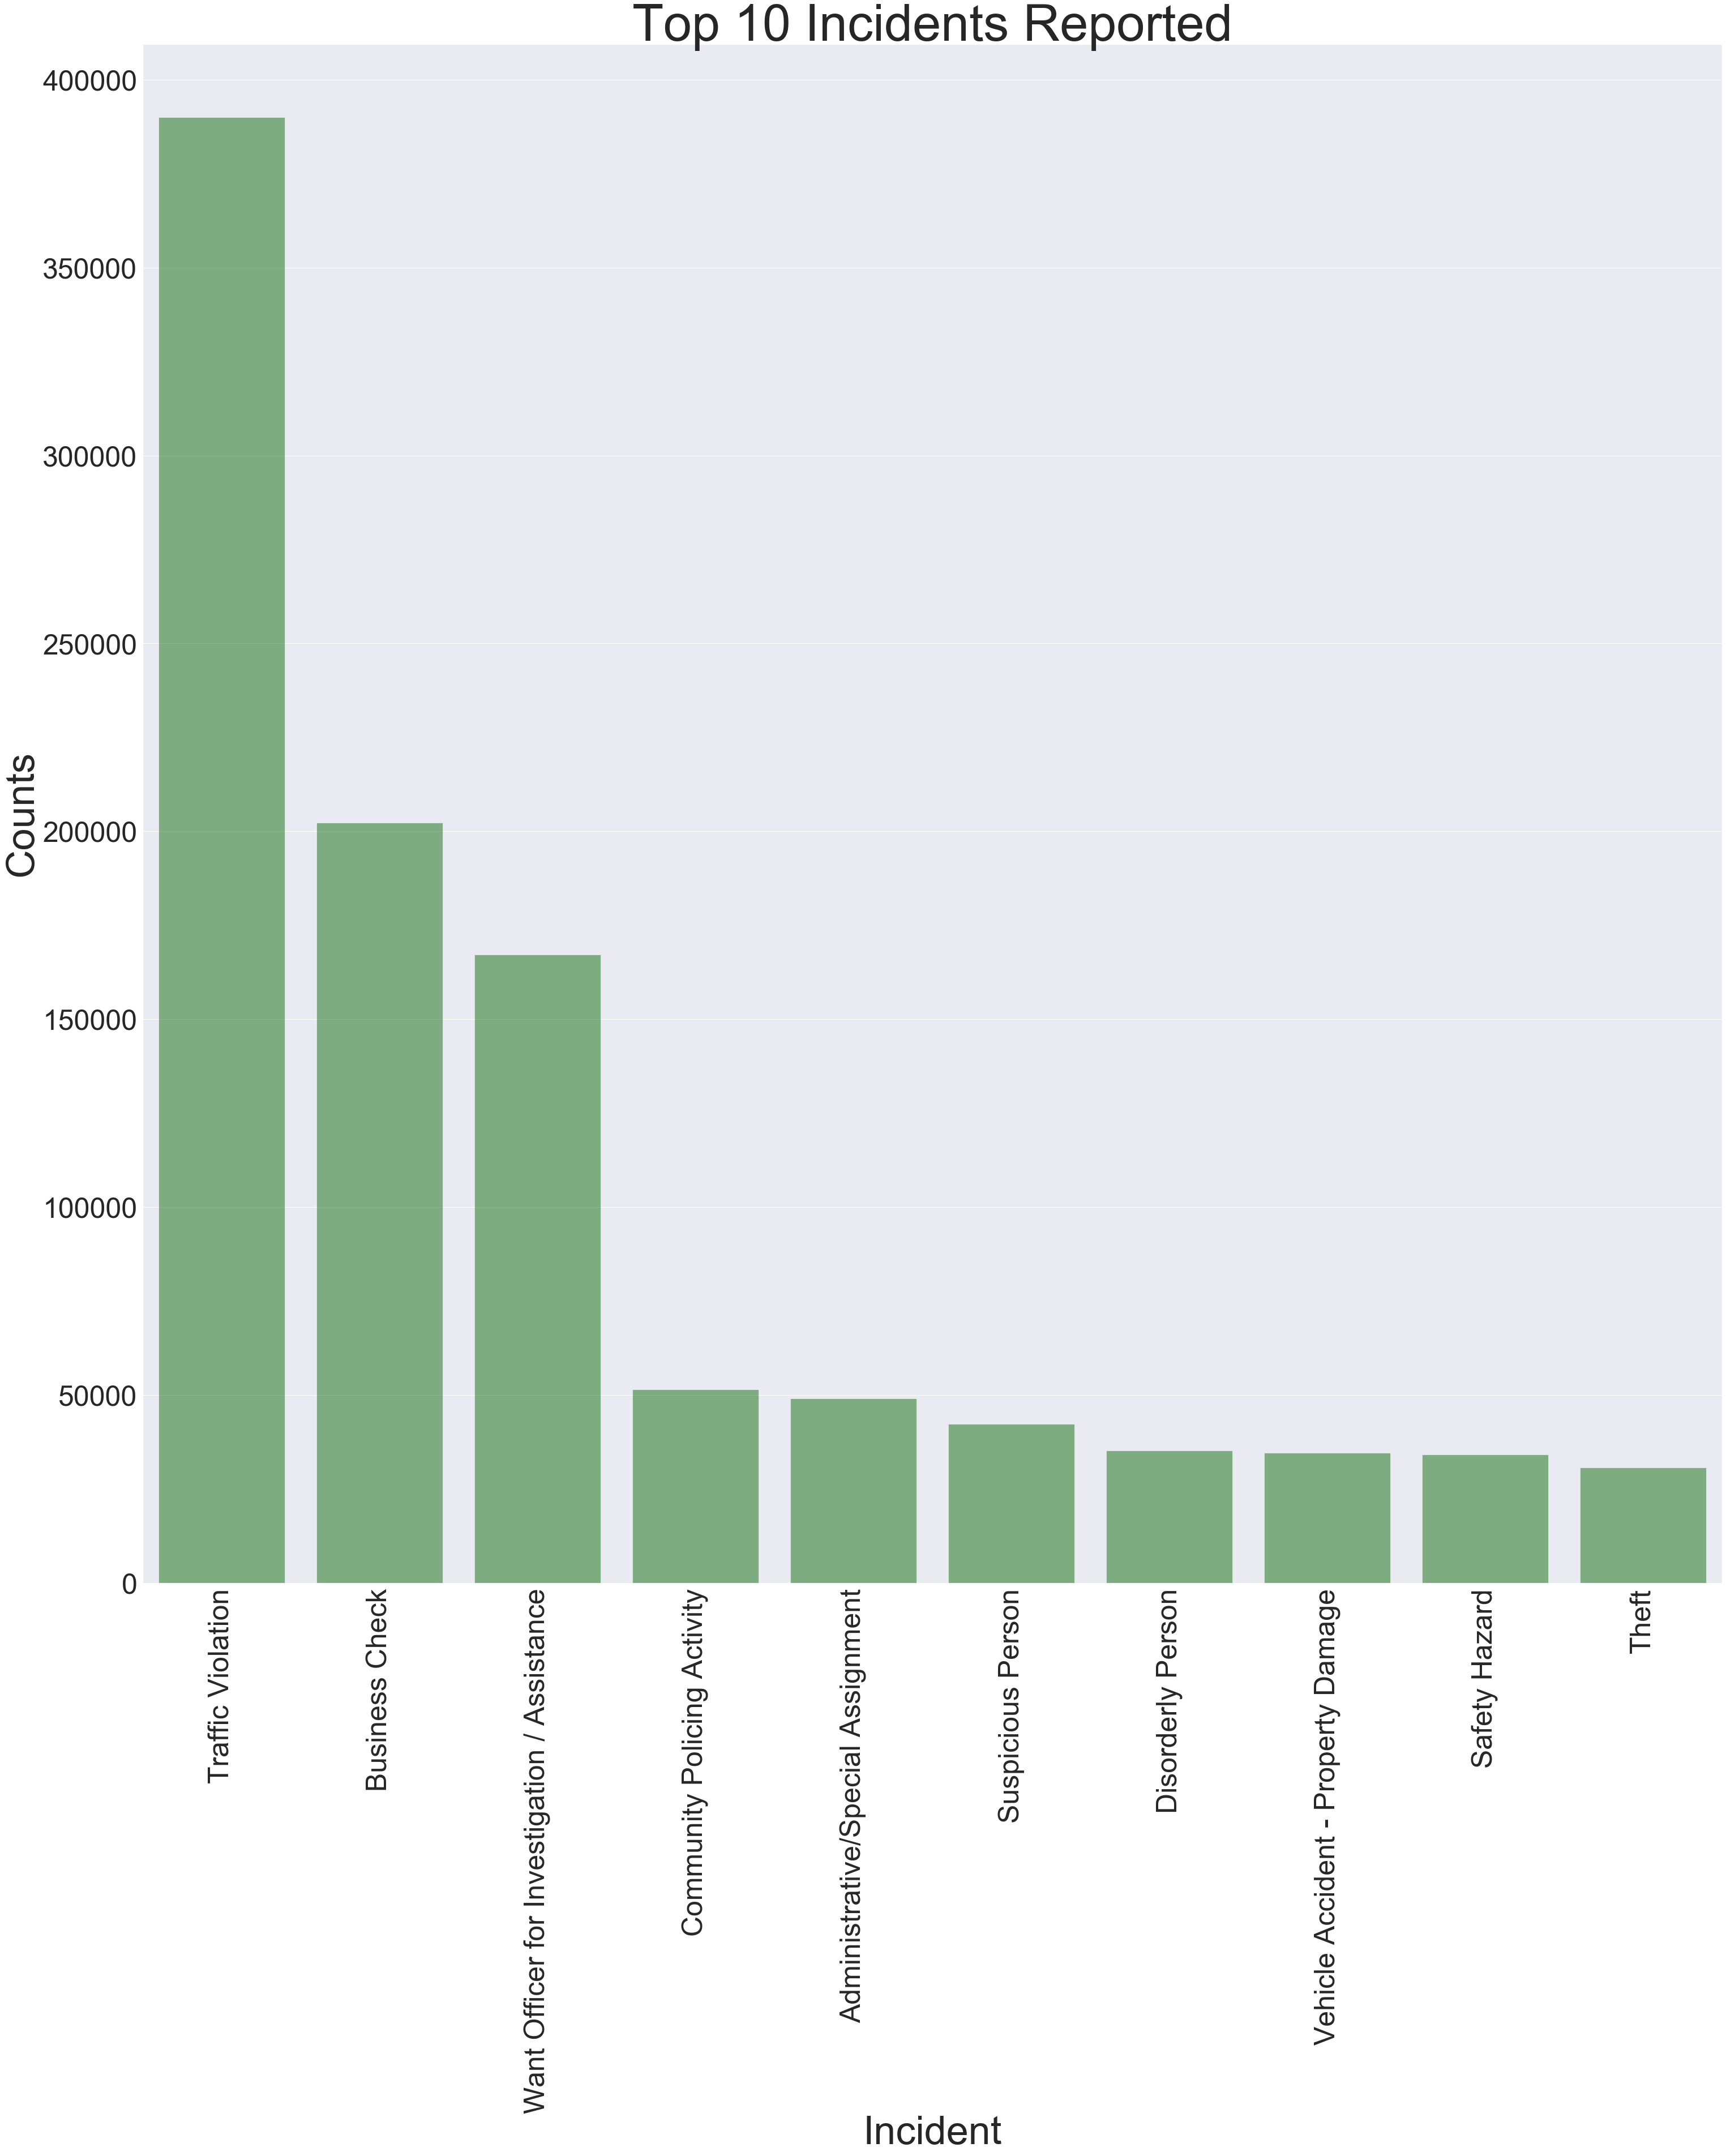

In [28]:

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [29]:
# Smallest x number of incidents

s25 = inc_cts.nsmallest(10,['Count'])

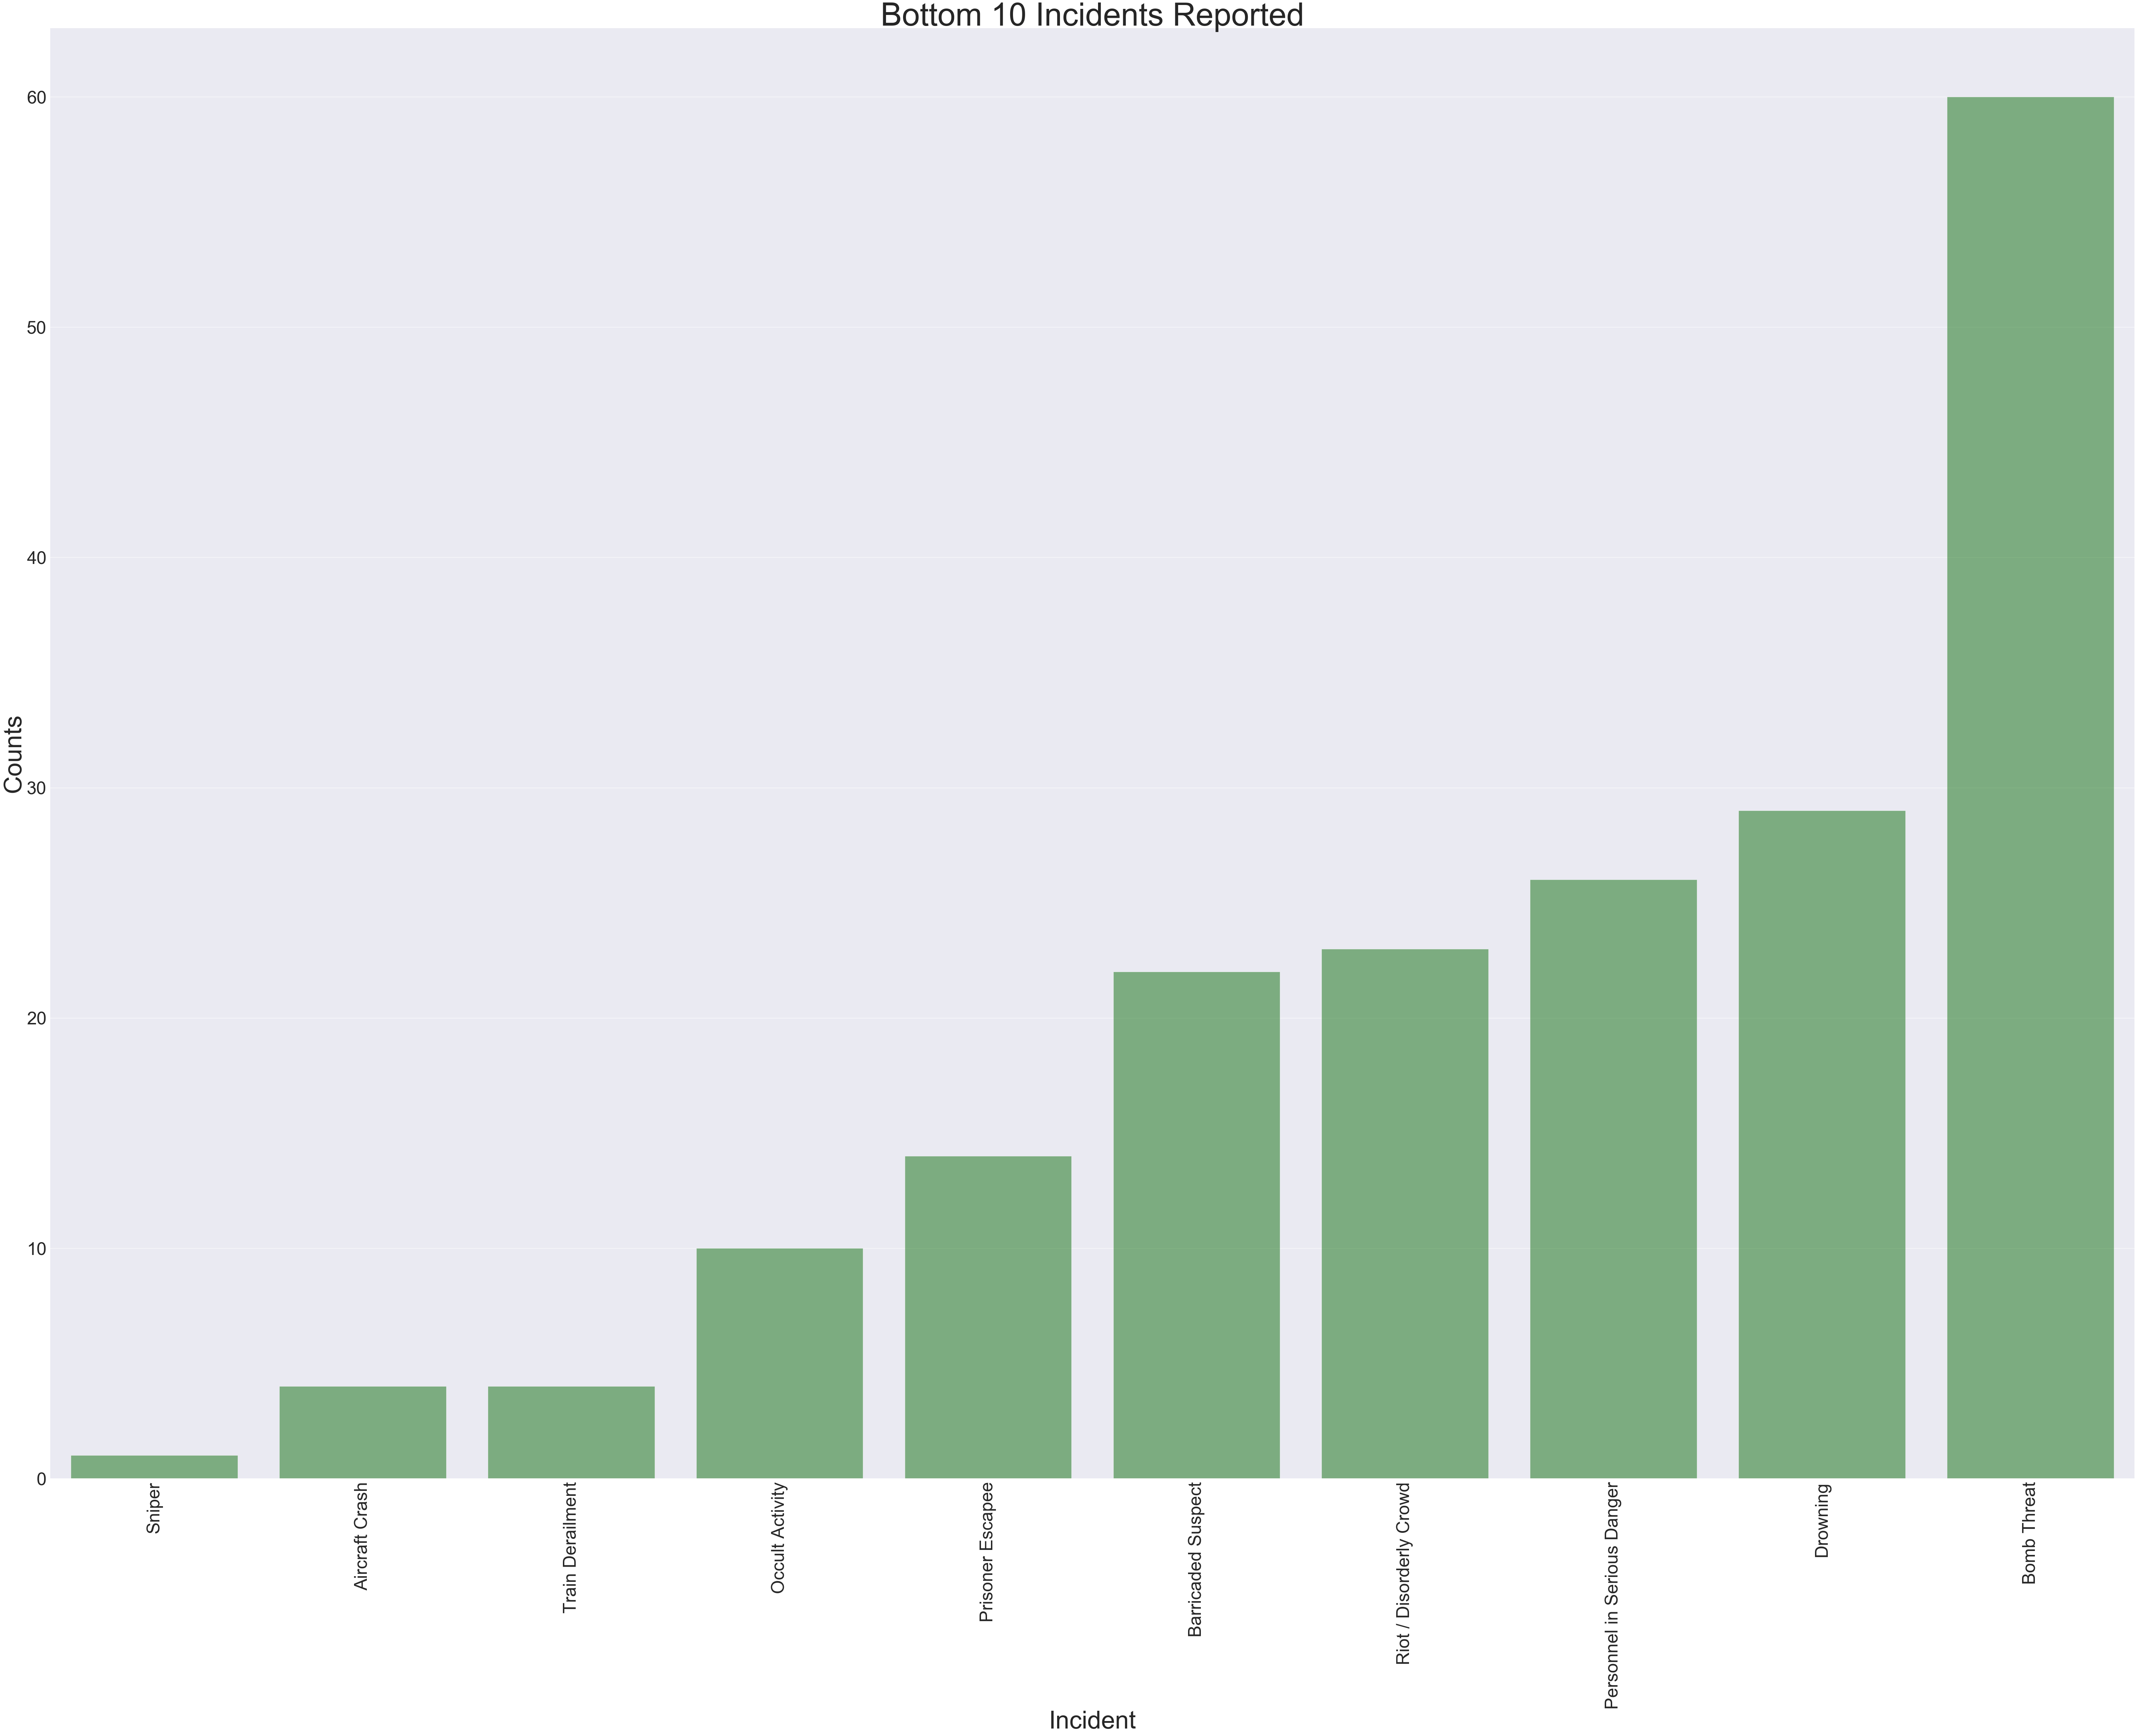

In [30]:

g = sns.barplot(x = "Incident",y = "Count", data = s25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Mapping